## 0. Data Prepareation

### Load and Split Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank-Customer-Attrition-Insights-Data.csv to Bank-Customer-Attrition-Insights-Data.csv


In [ ]:
import pandas as pd
df=pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")

In [ ]:
#Split the data (training, validation and test dataset )
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['Exited'], random_state=42)

Target Variable Distribution (Proportions):
          Train   Test
Exited                
0       0.79625  0.796
1       0.20375  0.204


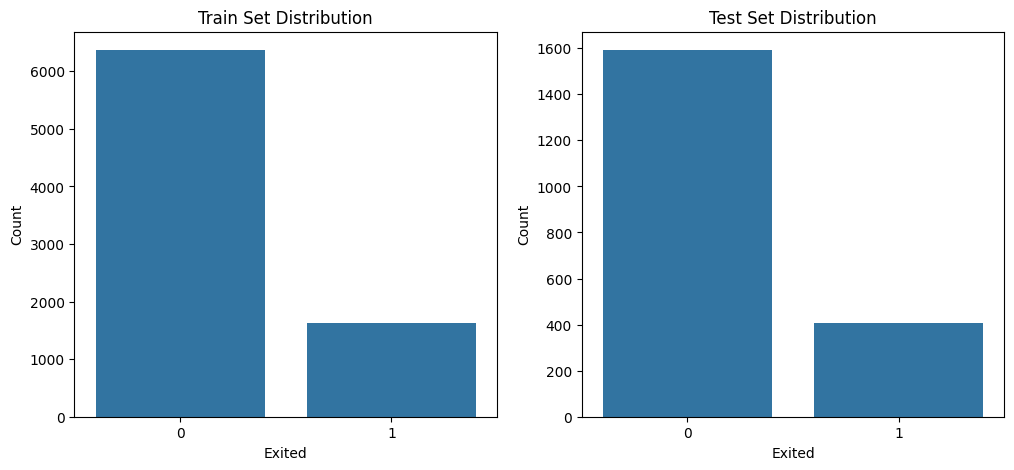

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distributions(train, test, target_col='Exited'):
    data = {'Train': train, 'Test': test}

    # Compute normalized value counts for each dataset
    distributions = {name: df[target_col].value_counts(normalize=True) for name, df in data.items()}
    comparison_df = pd.DataFrame(distributions).fillna(0)
    print("Target Variable Distribution (Proportions):")
    print(comparison_df)

    # Plot using countplot
    fig, axes = plt.subplots(1, len(data), figsize=(12, 5))
    for ax, (name, df) in zip(axes, data.items()):
        sns.countplot(x=target_col, data=df, ax=ax)
        ax.set_title(f"{name} Set Distribution")
        ax.set_ylabel("Count")

    plt.show()

# Example usage:
compare_distributions(train_set, test_set, target_col='Exited')

### Data Cleaning

In [ ]:
#Make a copy of training data
trial=train_set
trial.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
4791       4792    15742091  Parkhill          709     Spain    Male   35   
8881       8882    15794276    Steele          744    France    Male   29   
6166       6167    15633419    Brooks          773    France    Male   64   
4473       4474    15690733    Angelo          646   Germany  Female   29   
854         855    15743570      Feng          675    France  Female   57   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
4791       2       0.00              2          1               0   
8881       1   43504.42              1          1               1   
6166       2  145578.28              1          0               1   
4473       4  105957.44              1          1               0   
854        8       0.00              2          0               1   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
4791        104982.39       0         0                   2      GOLD   
8881        119327.75       0         0                   1  PLATINUM   
6166        186172.85       0         0                   1    SILVER   
4473         15470.91       0         0                   1  PLATINUM   
854          95463.29       0         0                   3    SILVER   

      Point Earned  
4791           422  
8881           607  
6166           630  
4473           345  
854            632

In [ ]:
#No missing values in any of the variables
trial.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
#The dataset contains intergers variables and objects (Surname & Geography & Gender & Card Type). Binary (HasCrCard, IsActiveMember, Complain)
trial.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [ ]:
#Drop useless variables
trial=trial.drop(columns=['RowNumber', 'CustomerId' ,'Surname'])

## 1. Data Exploration Analysis

### Target Variable Analysis

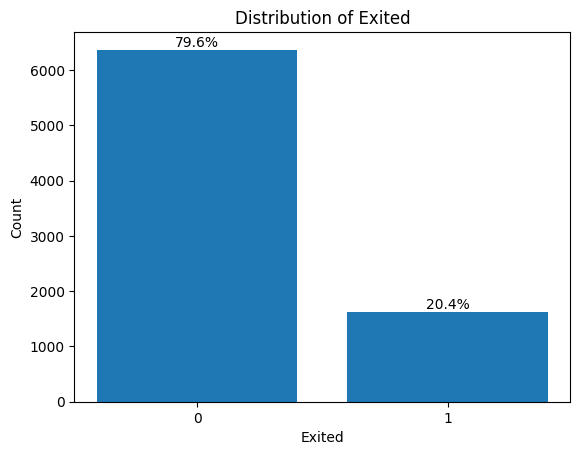

In [ ]:
#Target Variable
counts = trial['Exited'].value_counts()
percentages = trial['Exited'].value_counts(normalize=True) * 100
fig, ax = plt.subplots()
bars = ax.bar(counts.index.astype(str), counts.values)
for bar, pct in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Exited')
ax.set_ylabel('Count')
ax.set_title('Distribution of Exited')
plt.show()


### Categorical Variables Analysis

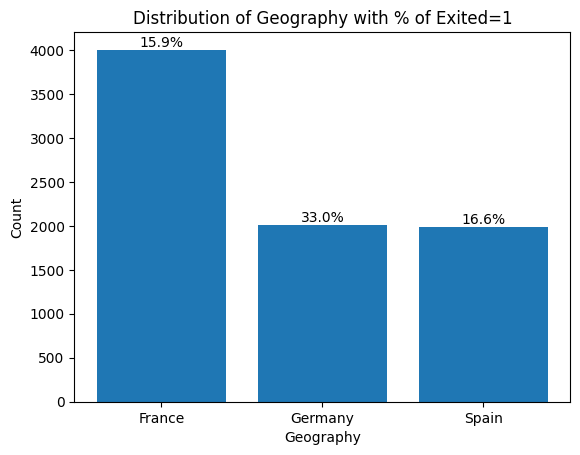

In [ ]:
#Geography: the average attrition in germany is higher than the rest but there is a imbalance data from France compare to the others
geo_counts = trial['Geography'].value_counts()
geo_pct_exited = trial.groupby('Geography')['Exited'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(geo_counts.index, geo_counts.values)
for category, bar in zip(geo_counts.index, bars):
    pct = geo_pct_exited.loc[category]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Geography')
ax.set_ylabel('Count')
ax.set_title('Distribution of Geography with % of Exited=1')
plt.show()

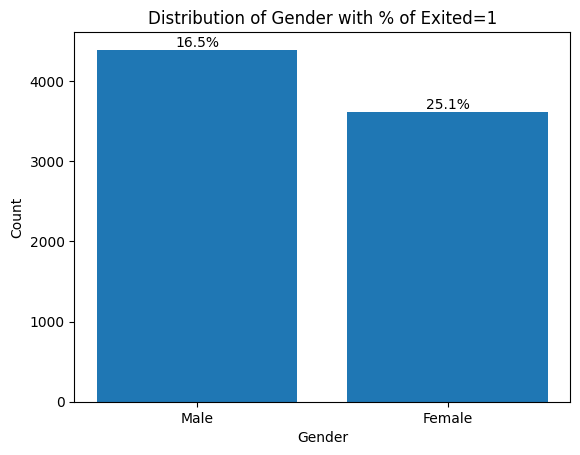

In [ ]:
#Gender: The average attrition is higher in Female gender, indicating the importance of the variable. The imbalacen in genre is not clear enough
geo_counts = trial['Gender'].value_counts()
geo_pct_exited = trial.groupby('Gender')['Exited'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(geo_counts.index, geo_counts.values)
for category, bar in zip(geo_counts.index, bars):
    pct = geo_pct_exited.loc[category]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender with % of Exited=1')
plt.show()

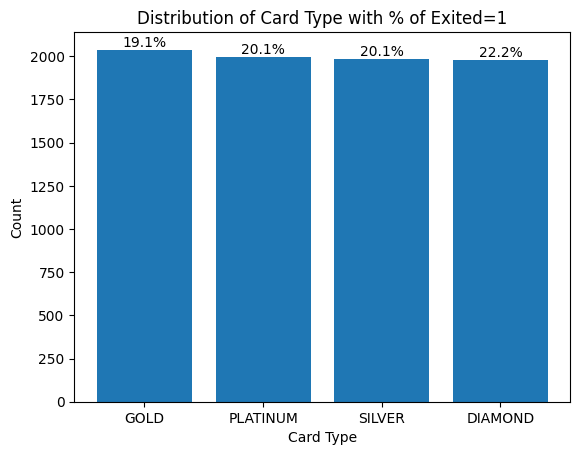

In [ ]:
#Card Type: The data is balance for this feature, the average attrition is the same
geo_counts = trial['Card Type'].value_counts()
geo_pct_exited = trial.groupby('Card Type')['Exited'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(geo_counts.index, geo_counts.values)
for category, bar in zip(geo_counts.index, bars):
    pct = geo_pct_exited.loc[category]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.1f}%', ha='center', va='bottom')
ax.set_xlabel('Card Type')
ax.set_ylabel('Count')
ax.set_title('Distribution of Card Type with % of Exited=1')
plt.show()

### Binary Variables Analysis

Exited             0          1  Total Count
HasCrCard                                   
0          78.589744  21.410256         2340
1          80.053004  19.946996         5660


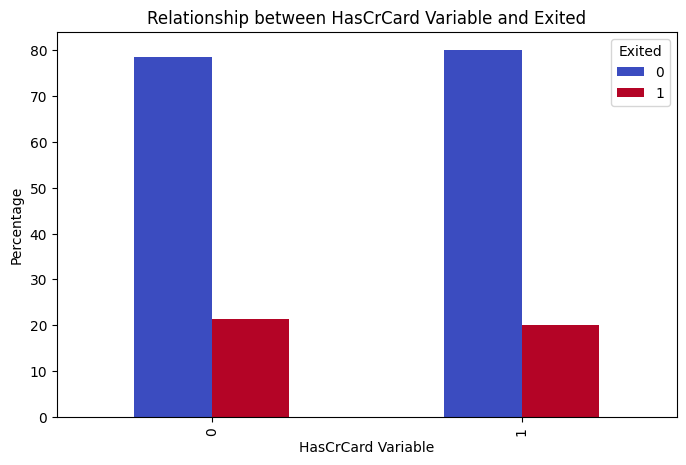

In [ ]:
#HasCrCard: Is imbalance the amount of people who dont have a credit card, but the average attrition is similar for both categories
cross_tab = pd.crosstab(trial['HasCrCard'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['HasCrCard'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['HasCrCard'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('HasCrCard Variable')
plt.ylabel('Percentage')
plt.title('Relationship between HasCrCard Variable and Exited')
plt.legend(title="Exited")
plt.show()

Exited                  0          1  Total Count
IsActiveMember                                   
0               73.467804  26.532196         3867
1               85.385918  14.614082         4133


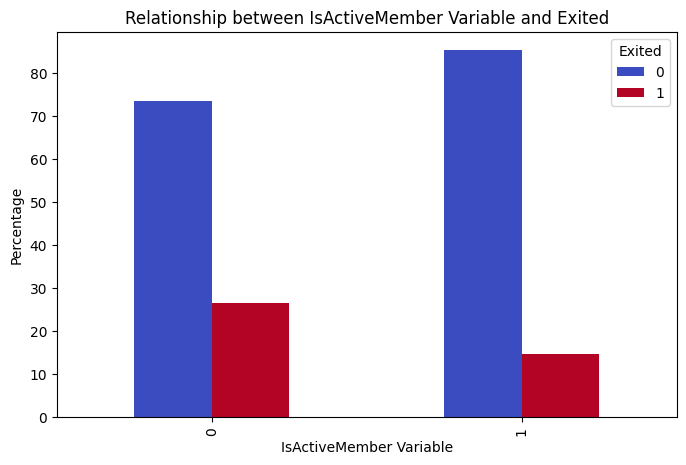

In [ ]:
#IsActiveMember: The data is balance for the category. The average attrition is higher for not active members
cross_tab = pd.crosstab(trial['IsActiveMember'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['IsActiveMember'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['IsActiveMember'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('IsActiveMember Variable')
plt.ylabel('Percentage')
plt.title('Relationship between IsActiveMember Variable and Exited')
plt.legend(title="Exited")
plt.show()

Exited            0          1  Total Count
Complain                                   
0         99.968568   0.031432         6363
1          0.549786  99.450214         1637


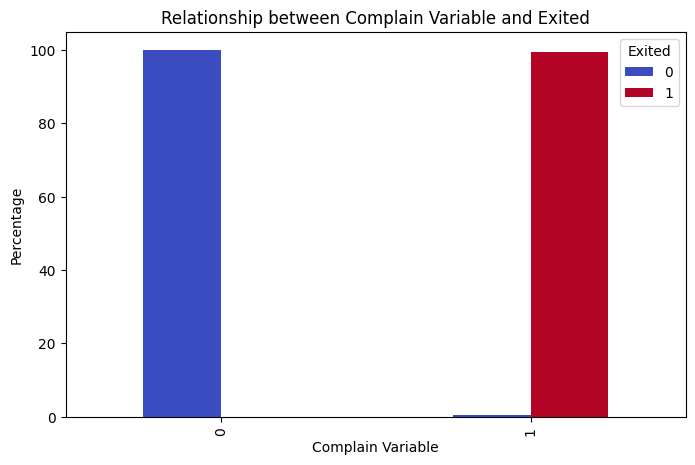

In [ ]:
#Complain: Low number of people who complain, however excibit a high attrition. While if there is not complain, the attrition is low.
cross_tab = pd.crosstab(trial['Complain'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['Complain'].value_counts()
print(cross_tab)
    #Graph
cross_tab = pd.crosstab(trial['Complain'], trial['Exited'], normalize='index') * 100
cross_tab.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.xlabel('Complain Variable')
plt.ylabel('Percentage')
plt.title('Relationship between Complain Variable and Exited')
plt.legend(title="Exited")
plt.show()

### Numerical Variables Analysis

In [ ]:
numerical_trial = trial.select_dtypes(include=['number']).drop(['IsActiveMember','Exited','Complain','HasCrCard'], axis=1)

In [ ]:
#Age: The standard devition is high due to extreme values
#Balance: There is high volatility influence by high values in the right extreme
#EstimatedSalary: The minimum values are not significant, can be for a bad estimation of salary. The high ends looks more well distributed than the left side
numerical_trial.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  8000.000000  8000.000000  8000.000000    8000.000000    8000.000000   
mean    650.648750    38.927375     5.008750   76444.674701       1.530250   
std      96.696099    10.554076     2.890453   62308.185004       0.582346   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   96953.155000       1.000000   
75%     718.000000    44.000000     8.000000  127665.115000       2.000000   
max     850.000000    92.000000    10.000000  238387.560000       4.000000   

       EstimatedSalary  Satisfaction Score  Point Earned  
count      8000.000000         8000.000000   8000.000000  
mean      99519.501648            3.011000    606.100125  
std       57428.678611            1.410364    226.075402  
min          11.580000            1.000000    119.000000  
25%       50263.057500            2.000000    409.000000  
50%       99018.495000            3.000000    604.000000  
75%      148351.287500            4.000000    800.000000  
max      199992.480000            5.000000   1000.000000

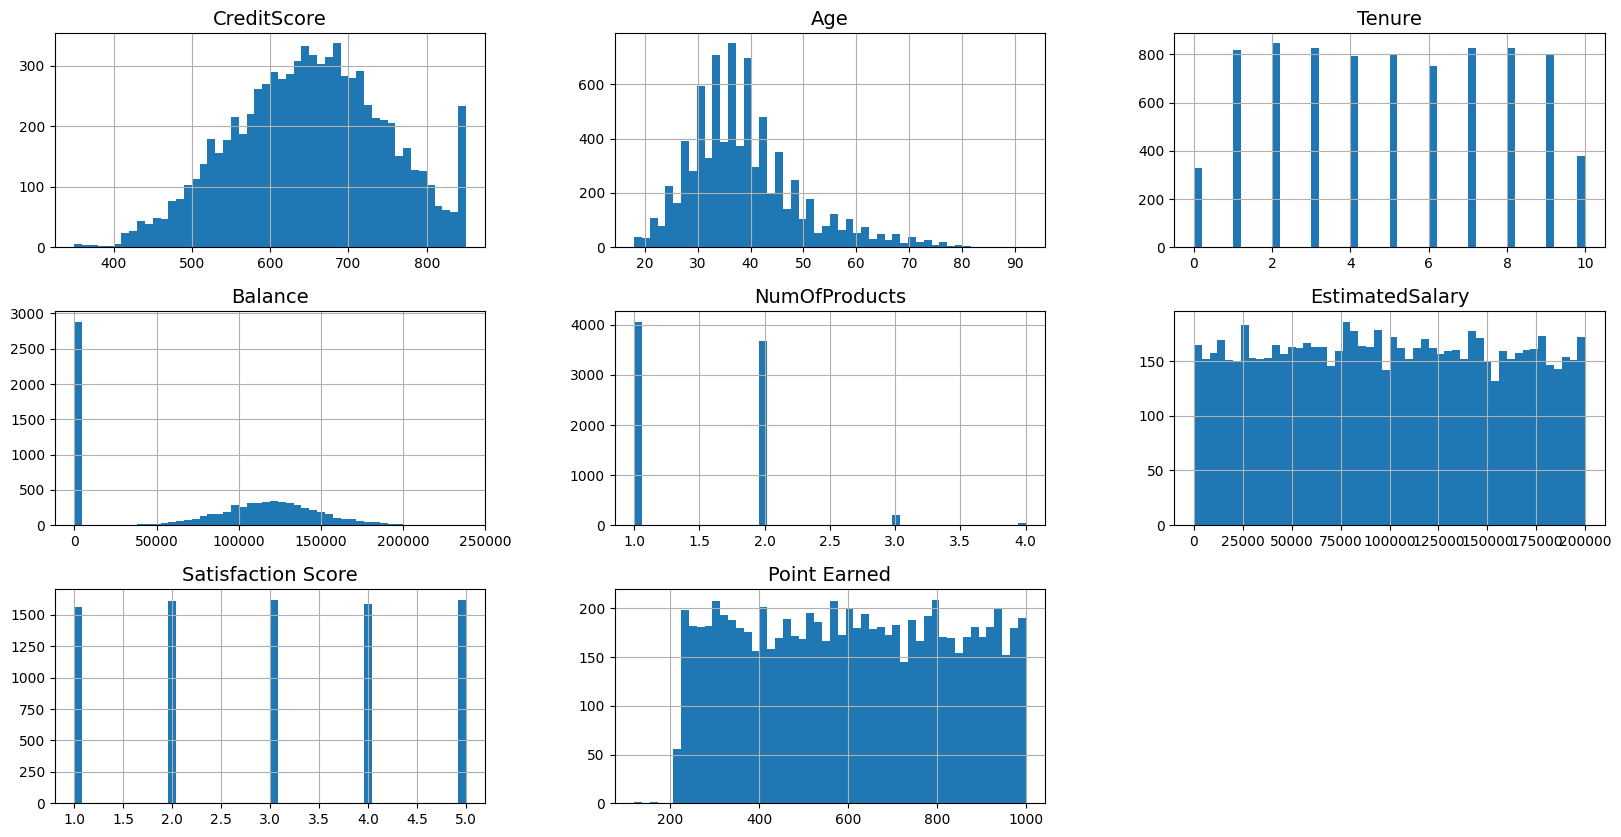

In [ ]:
#Age: Distribution skew to the right
#Balance: Accumulate values in cero, and after that have another normal distribution. Possible to differenciate between having or not any amount in the balance
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

numerical_trial.hist(bins=50, figsize=(20, 10))
plt.show()

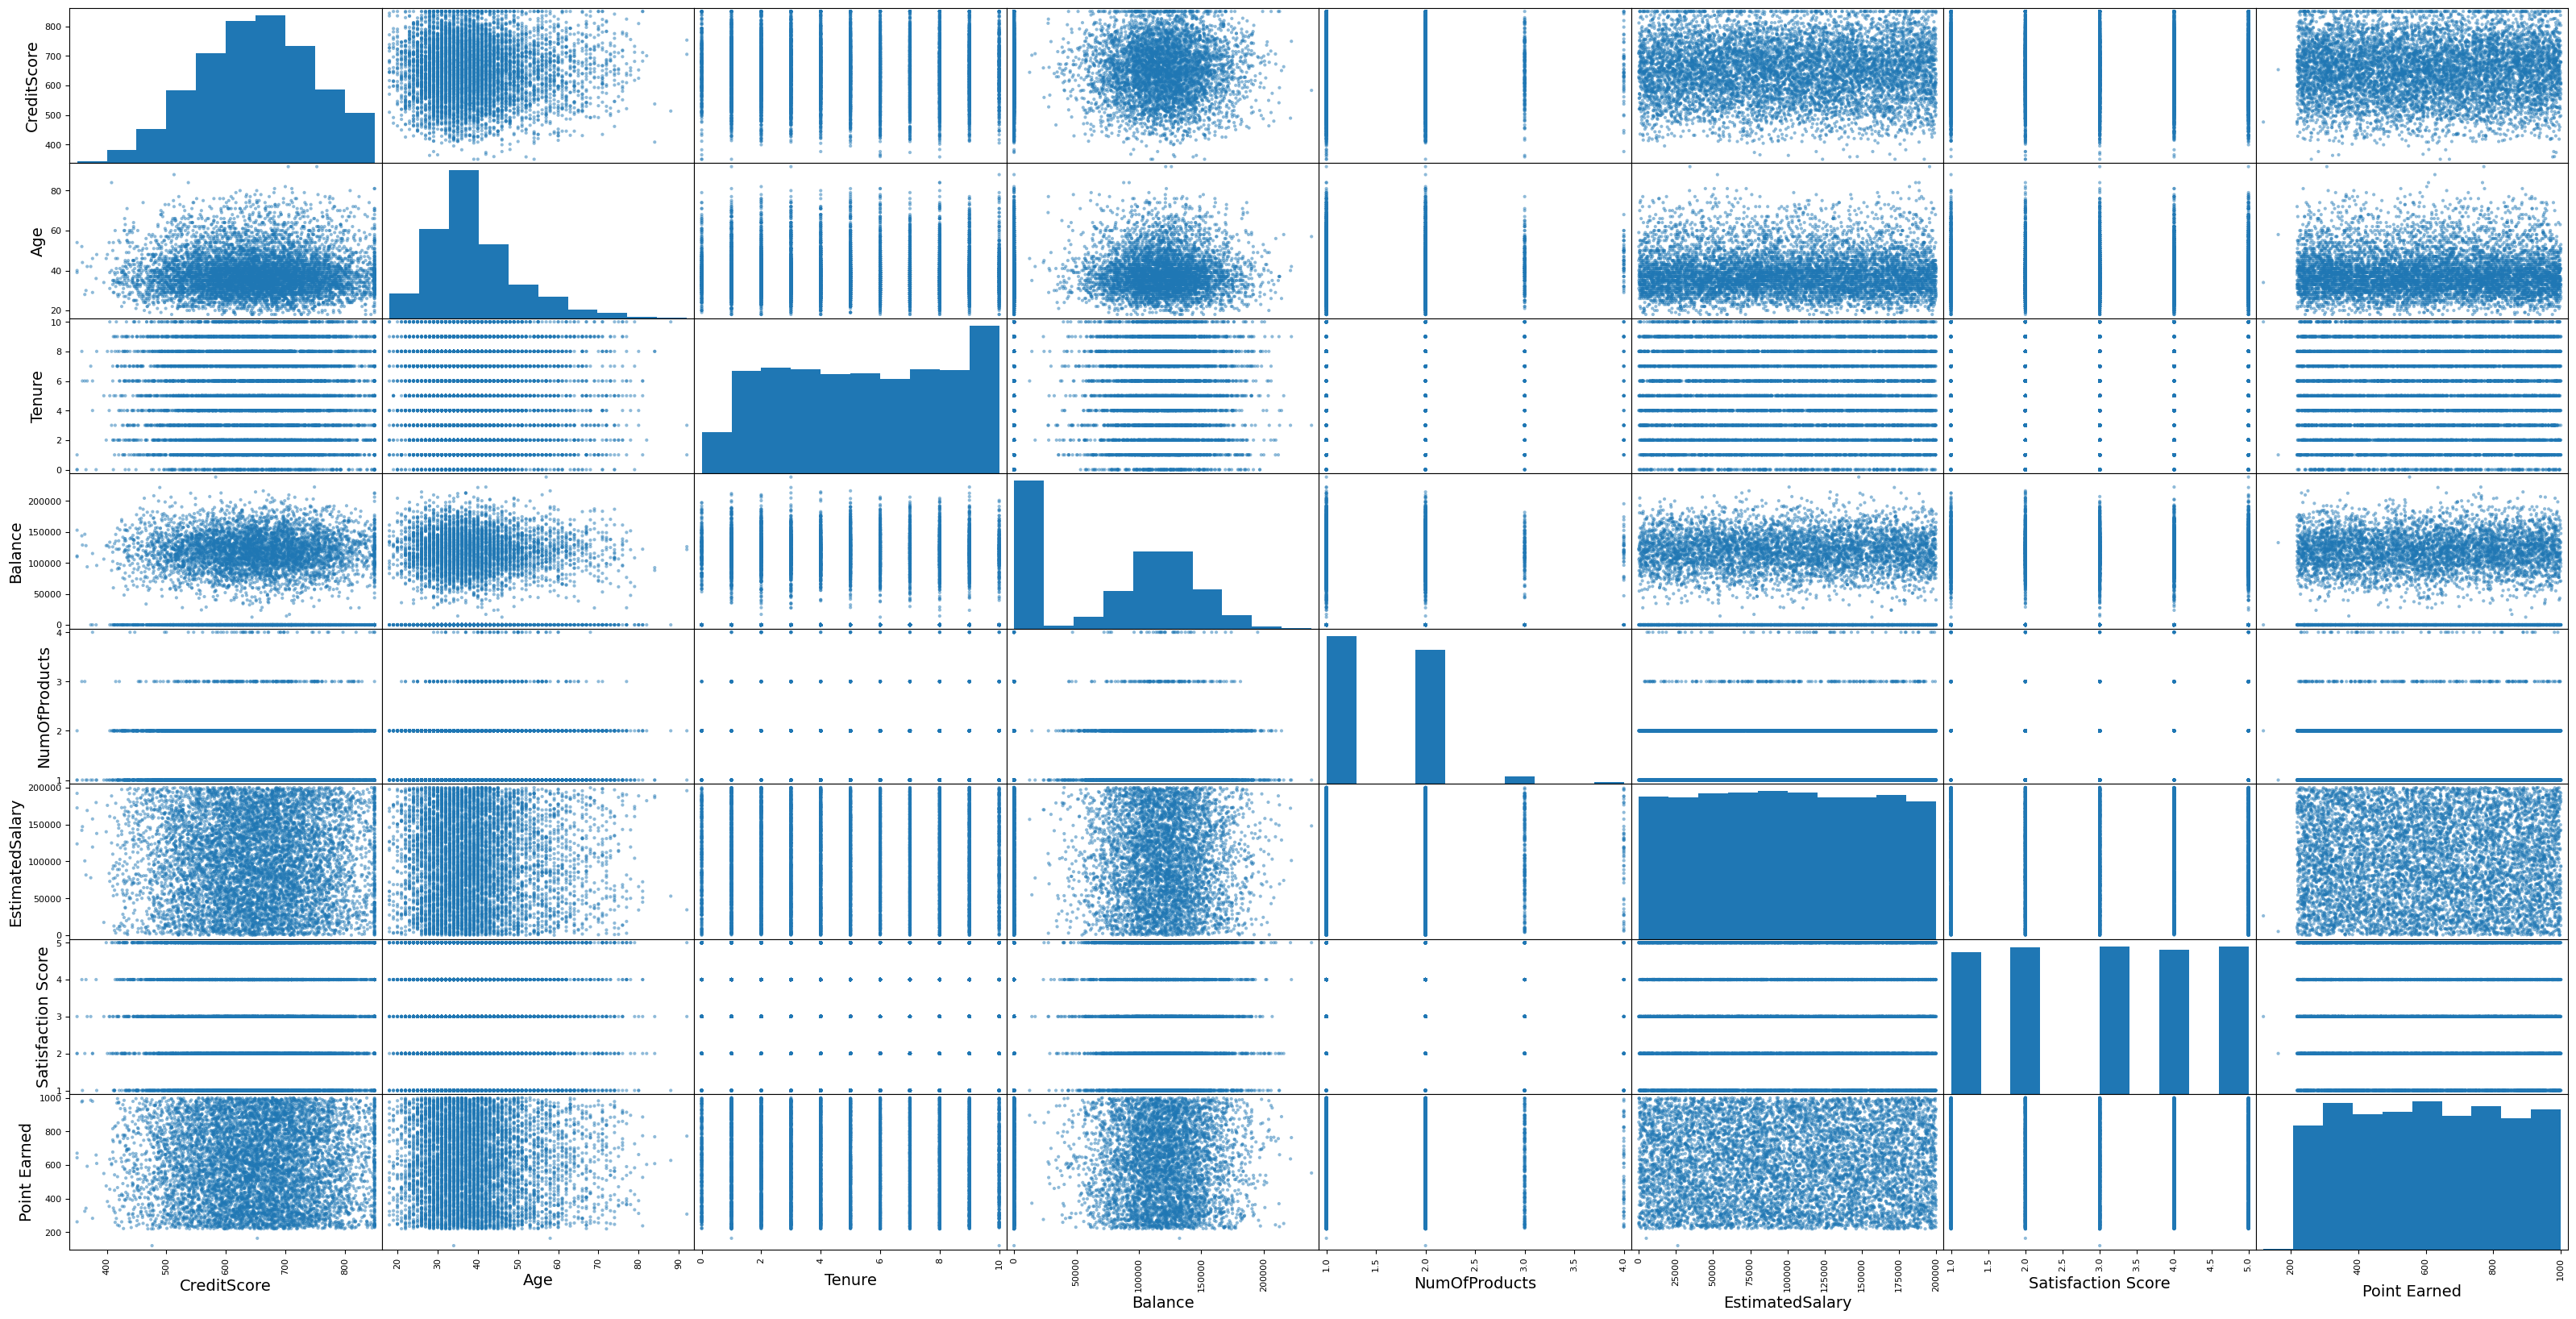

In [ ]:
#There is not a clear relationship between variables that may indicate any time of interaction
from pandas.plotting import scatter_matrix
scatter_matrix(numerical_trial, figsize=(40, 20))
plt.show()

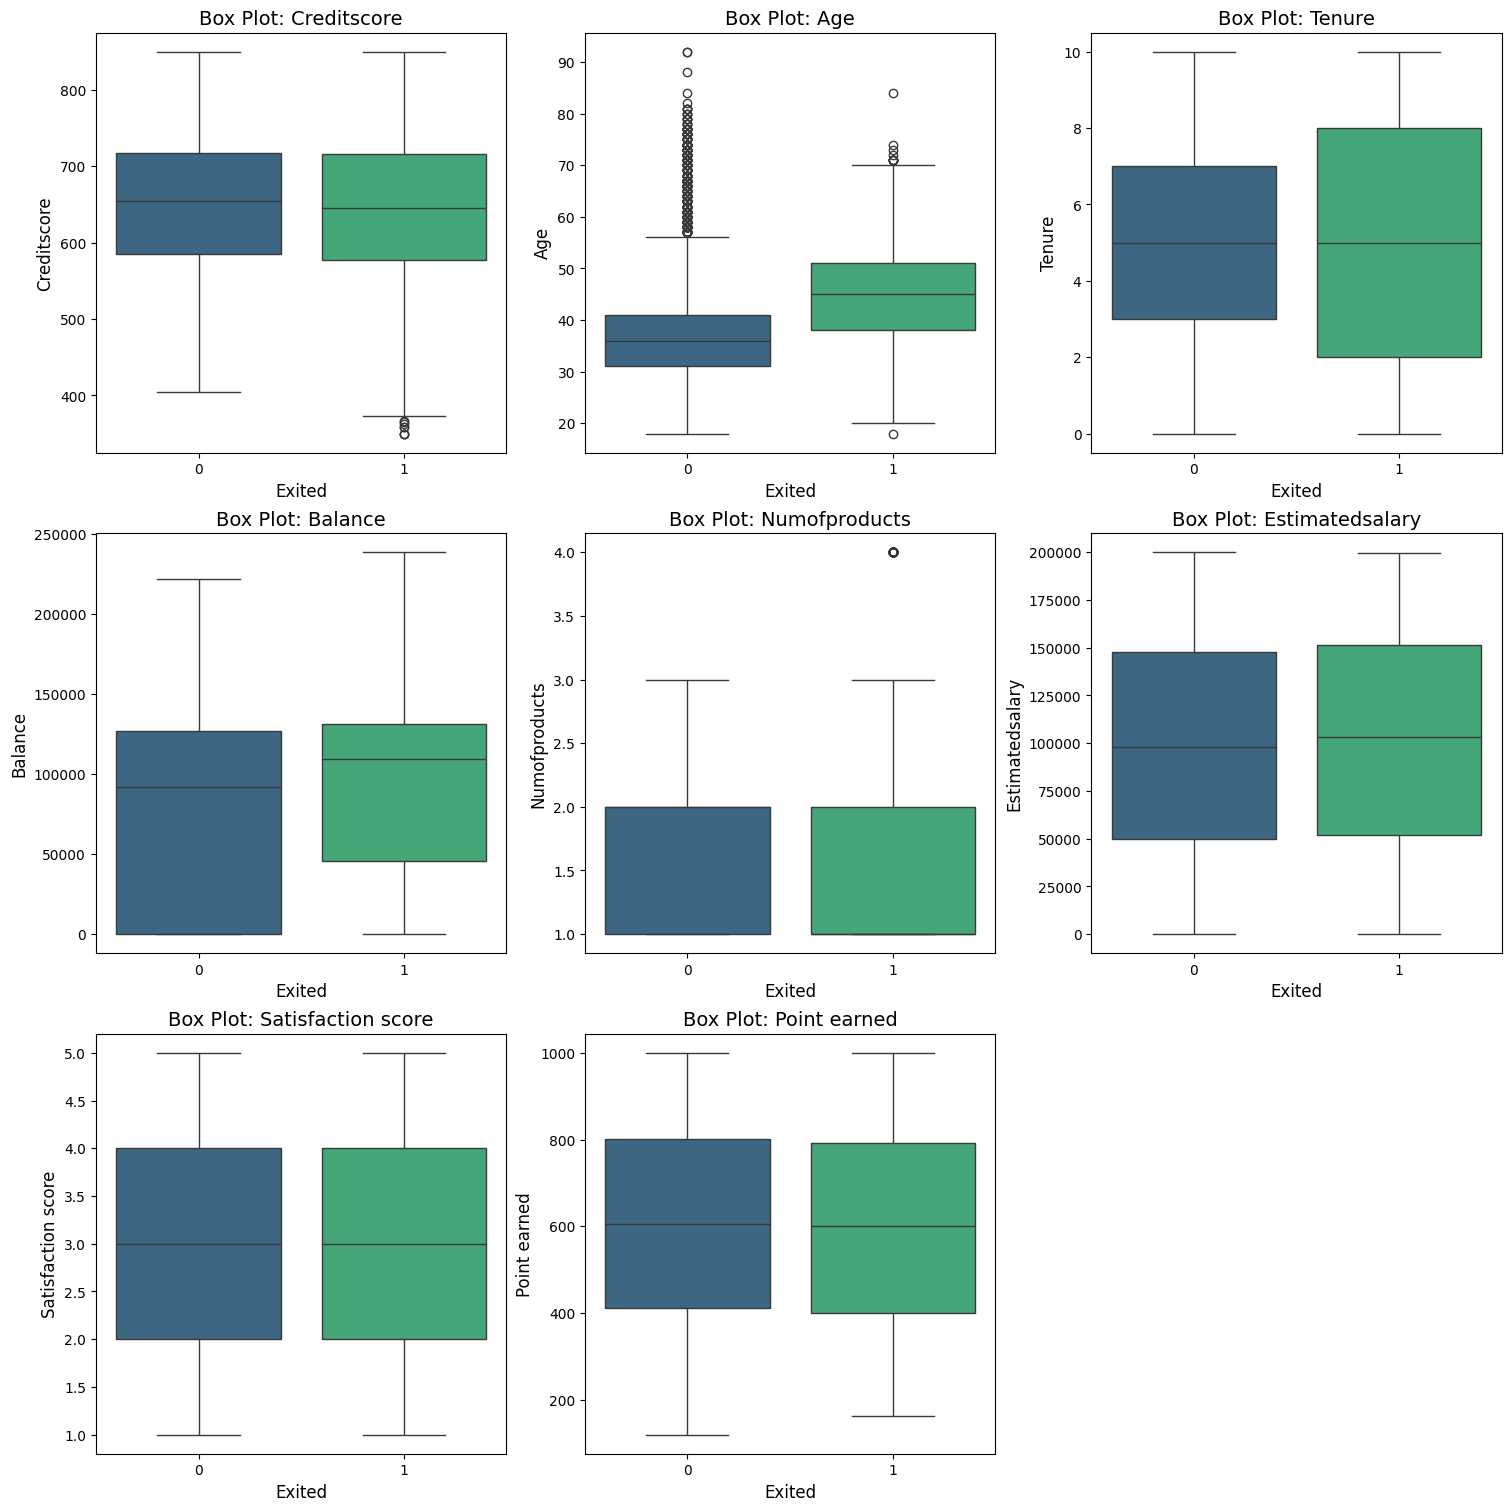

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numeric columns excluding the binary target ('popular')
num_columns = [col for col in numerical_trial]

# Define the number of plots per row
n_cols = 3
n_rows = (len(num_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure and subplots with constrained layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Create box plots for each numerical variable
for idx, column in enumerate(numerical_trial):
    ax = axes[idx]  # Select the current subplot

    # Create a box plot grouped by the 'popular' column
    sns.boxplot(data=trial, x='Exited', y=column, hue='Exited', ax=ax, palette='viridis')
    if ax.get_legend() is not None:
        ax.get_legend().remove()

    # Add titles and labels
    ax.set_title(f'Box Plot: {column.capitalize()}', fontsize=14)
    ax.set_xlabel('Exited', fontsize=12)
    ax.set_ylabel(column.capitalize(), fontsize=12)

# Remove any unused subplots
for idx in range(len(num_columns), len(axes)):
    fig.delaxes(axes[idx])

# Display the plots
plt.show()



In [ ]:
#Estimated Salary
import numpy as np
trial['salary_group'] = np.where(trial['EstimatedSalary'] < 1000, 'Below 1000', 'Above 1000')
cross_tab = pd.crosstab(trial['salary_group'], trial['Exited'], normalize='index')*100
cross_tab['Total Count'] = trial['salary_group'].value_counts()
print(cross_tab)
trial=trial.drop(columns=['salary_group'])
trial = trial[trial['EstimatedSalary'] >= 1000] #Eliminate this noise

Exited                0          1  Total Count
salary_group                                   
Above 1000    79.653136  20.346864         7957
Below 1000    74.418605  25.581395           43


## 2. Date Pipeline

### Feature Engineering

Exited               0          1  Total Count
has_balance                                   
0            86.476124  13.523876         2869
1            75.805818  24.194182         5088


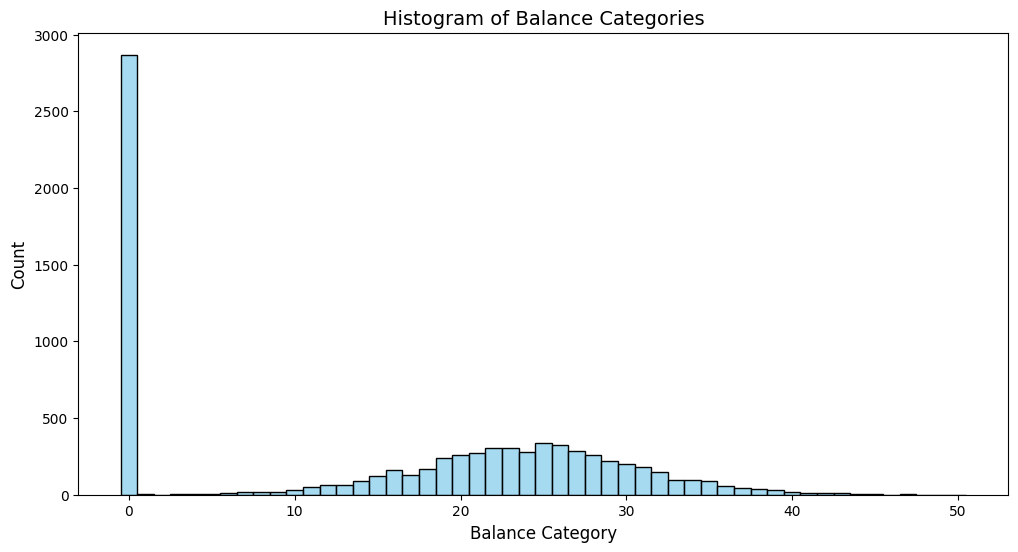

In [ ]:
### Balance ###: Separate having or not balance  or make categories according to the balance
#Binary variable( Has balance): people with no balance tend to have a lower attrition
trial['has_balance'] = (trial['Balance'] > 0).astype(int)
cross_tab = pd.crosstab(trial['has_balance'], trial['Exited'], normalize='index') * 100
cross_tab['Total Count'] = trial['has_balance'].value_counts()
print(cross_tab)

#Create a new categorical variable for balance
balance_cat = pd.Series(np.nan, index=trial.index)
balance_cat[trial['Balance'] == 0] = 0
nonzero_mask = trial['Balance'] != 0
bins = pd.cut(trial.loc[nonzero_mask, 'Balance'],bins=50,labels=range(1, 51))
balance_cat.loc[nonzero_mask] = pd.to_numeric(bins)
trial['balance_cat'] = balance_cat.astype(int)

    #Graph
plt.figure(figsize=(12, 6))
sns.histplot(trial['balance_cat'], bins=51, discrete=True, color='skyblue')
plt.title('Histogram of Balance Categories', fontsize=14)
plt.xlabel('Balance Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


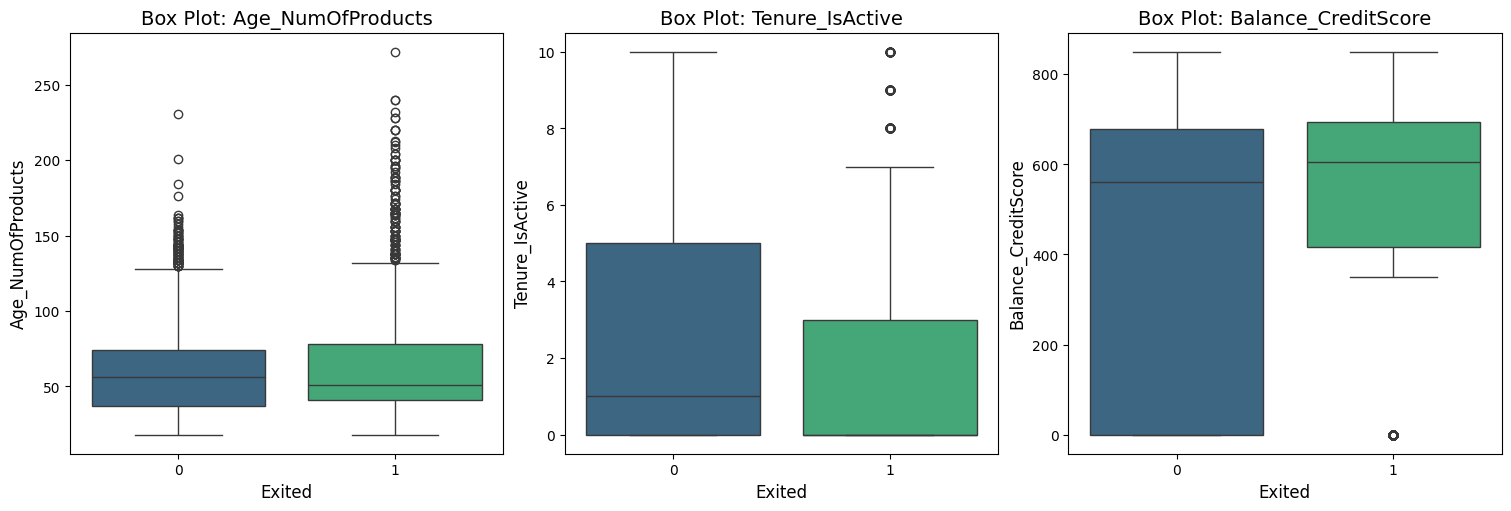

In [ ]:
### Interactions
trial['Tenure_IsActive'] = trial['Tenure'] * trial['IsActiveMember']  # A 10-year inactive customer is more likely to leave than a 2-year active customer.
trial['Balance_CreditScore'] = trial['has_balance'] * trial['CreditScore']  # A customer with a positive balance and good credit might leave because more options available.
trial['Age_NumOfProducts'] = trial['Age'] * trial['NumOfProducts']  # A 25-year-old with 1 product is more likely to churn than a 50-year-old with 3 products.

interaction_vars = ['Age_NumOfProducts', 'Tenure_IsActive', 'Balance_CreditScore']

# Define number of plots per row
n_cols = 3
n_rows = 1  # Since we have only 3 interactions

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5), constrained_layout=True)
axes = axes.flatten()

for idx, column in enumerate(interaction_vars):
    sns.boxplot(data=trial, x='Exited', y=column, hue='Exited', palette='viridis', ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {column}', fontsize=14)
    axes[idx].set_xlabel('Exited', fontsize=12)
    axes[idx].set_ylabel(column, fontsize=12)
    # Remove the legend to avoid redundancy
    axes[idx].legend_.remove()

plt.show()


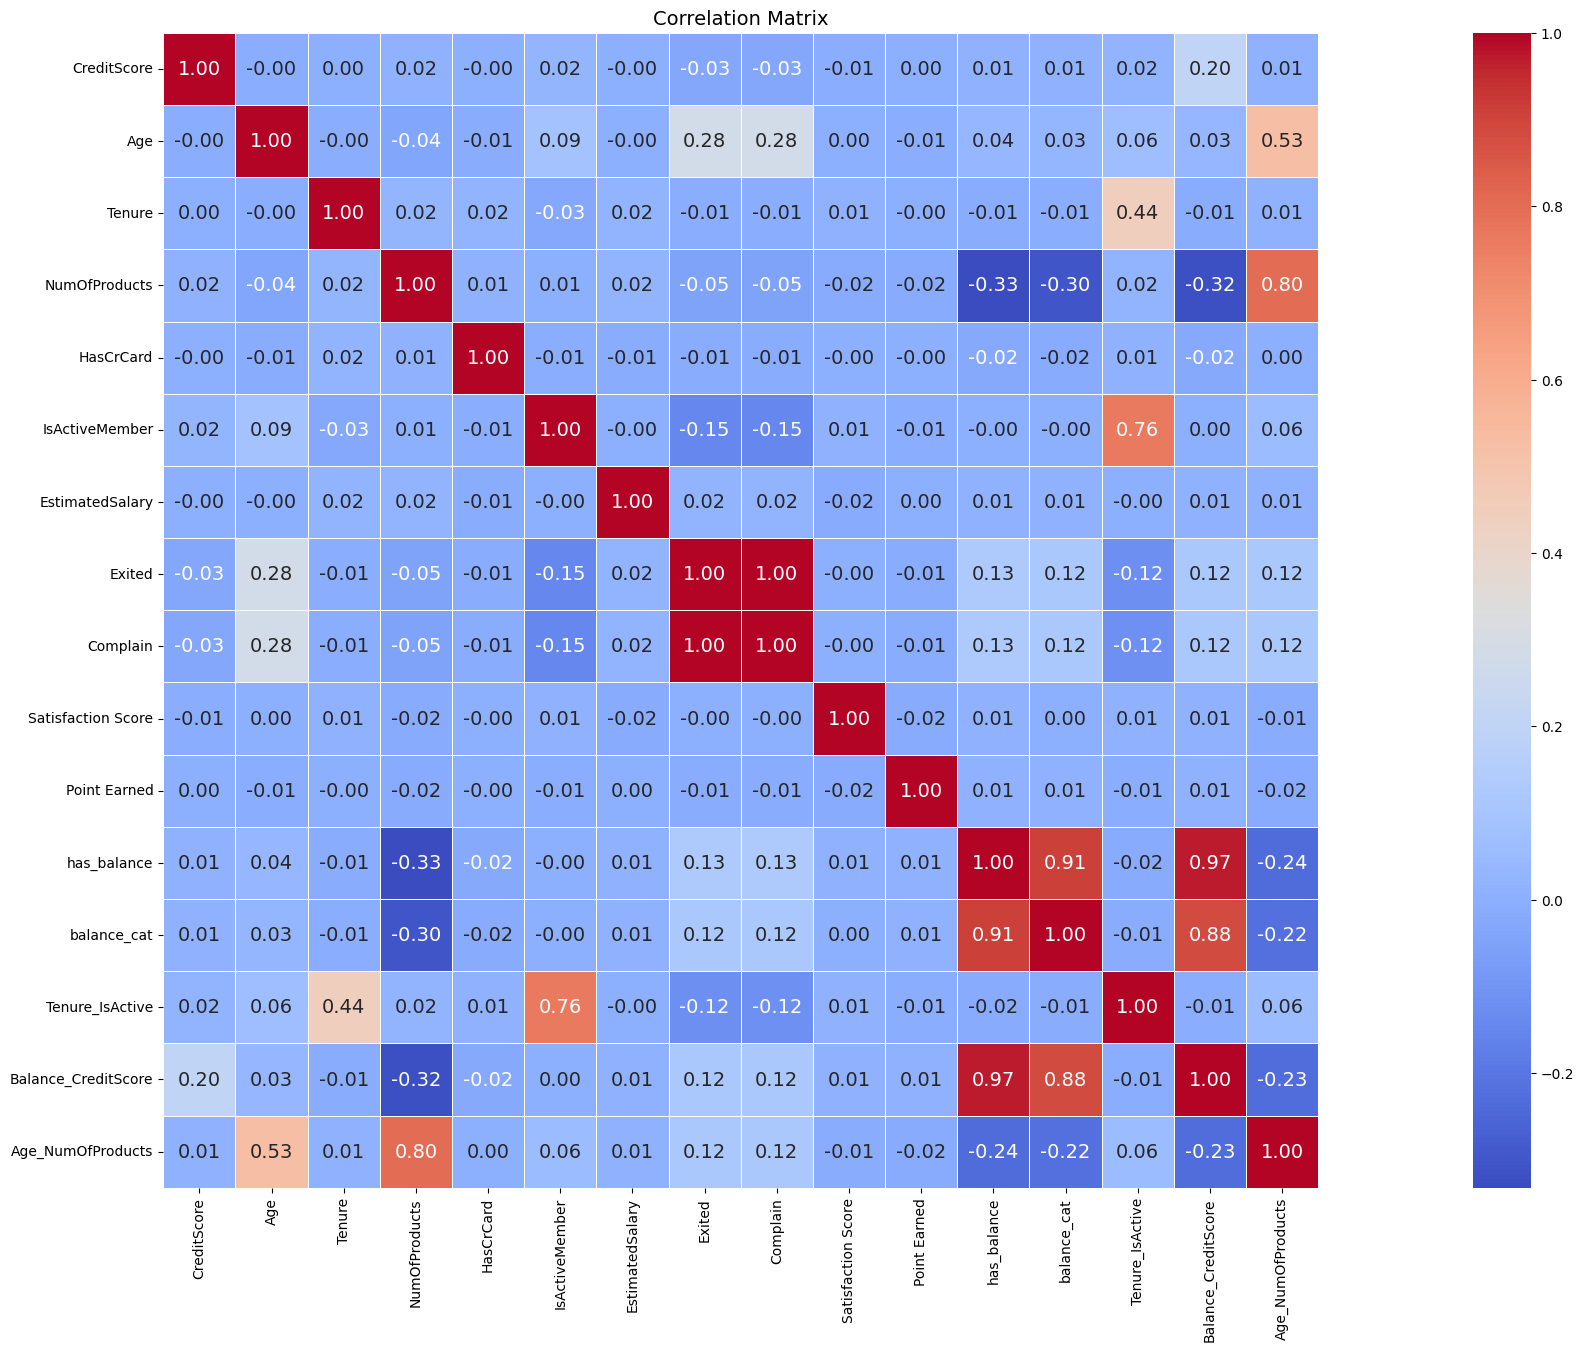

In [ ]:
#Correlation matrix
trial=trial.drop(columns=['Balance'])
    #Complain and Exited are perfectly correlated should be drop
    #Balance_CreditScore is highly corralated with another, therefore this new variable wont be used
    #Age_NumOfProducts is highly corralted, then should be drop
df_num = trial.select_dtypes(include=['number'])
correlation_matrix = df_num.corr()
plt.figure(figsize=(40, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.4)
plt.title('Correlation Matrix')
plt.show()


### Data Preparation

In [ ]:
#train_set, validation_set, test_set
train_set_2=train_set
#1. Create a new variable
train_set_2['has_balance'] = (train_set_2['Balance'] > 0).astype(int)
#2. Drop irrelevant columns
train_set_2=train_set_2.drop(columns=['RowNumber', 'CustomerId' ,'Surname','Complain','Balance'])
#3. Create a new variable
train_set_2['Tenure_IsActive'] = train_set_2['Tenure'] * train_set_2['IsActiveMember']
#4. One-Hot encoding of categorical variables (Geography, gender)
train_set_2 = pd.get_dummies(train_set_2, columns=['Geography'], drop_first=True)
train_set_2= pd.get_dummies(train_set_2, columns=['Gender'], drop_first=False)
train_set_2=train_set_2.drop(columns=['Gender_Male'])
#5. Encoding (Card Type)
mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}
train_set_2['Card_Type_encoded'] = train_set_2['Card Type'].map(mapping)
train_set_2 = train_set_2.drop(columns=['Card Type'])

Threshold for 5% most anomalous points: 2.4048959438444095e-17
      anomaly_score  outlier_probability  is_outlier
4791              1            -0.082295           0
8881              1            -0.073990           0
6166             -1             0.004537           1
4473              1            -0.071953           0
854               1            -0.007933           0


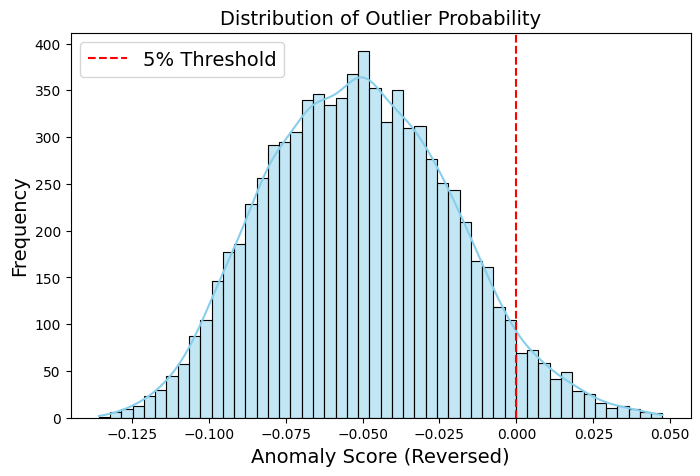

In [ ]:
import numpy as np
#6. Delete the noise values from the training
train_set_2 = train_set_2[train_set_2['EstimatedSalary'] >= 1000]
#7. Outliers detection : No need to delete outliers
from sklearn.ensemble import IsolationForest
features = train_set_2.drop(columns=['Exited'])
num_columns = features.select_dtypes(include=['number']).columns
X = features[num_columns]
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X)
scores = iso_forest.decision_function(X)
threshold_5_percentile = np.percentile(scores, 5)
train_set_2['anomaly_score'] = iso_forest.predict(X)
train_set_2['outlier_probability'] = -scores  # Reverse scores so that higher = more anomalous
train_set_2['is_outlier'] = (scores <= threshold_5_percentile).astype(int)
    # Display threshold and sample results
print(f"Threshold for 5% most anomalous points: {threshold_5_percentile}")
print(train_set_2[['anomaly_score', 'outlier_probability', 'is_outlier']].head())
    #Visualization
plt.figure(figsize=(8, 5))
sns.histplot(train_set_2['outlier_probability'], bins=50, kde=True, color='skyblue')
plt.axvline(x=-threshold_5_percentile, color='red', linestyle='--', label="5% Threshold")
plt.title("Distribution of Outlier Probability")
plt.xlabel("Anomaly Score (Reversed)")
plt.ylabel("Frequency")
plt.legend()
plt.show()
train_set_2 = train_set_2.drop(columns=['anomaly_score', 'outlier_probability', 'is_outlier'])

#8. Split the data target (Exited) vs predicting variables
y_train = train_set_2['Exited']
x_train = train_set_2.drop(columns=['Exited'])

In [ ]:
#9. Dealing with imbalanced data
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('under', RandomUnderSampler(sampling_strategy=1.0, random_state=42))
])
x_res, y_res = pipeline.fit_resample(x_train, y_train)

### Pipeline

In [ ]:
#Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Define a custom transformer for churn preprocessing
class ChurnPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Mapping for Card Type encoding
        self.mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}

    def fit(self, X, y=None):
        # No fitting needed; simply return self
        return self

    def transform(self, X):
        # Work on a copy of the DataFrame
        df = X.copy()

        # 1. Create a new variable 'has_balance'
        df['has_balance'] = (df['Balance'] > 0).astype(int)

        # 2. Drop irrelevant columns
        df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Complain', 'Balance'])

        # 3. Create a new variable 'Tenure_IsActive'
        df['Tenure_IsActive'] = df['Tenure'] * df['IsActiveMember']

        # 4. One-Hot Encoding of categorical variables
        #    a. Geography: drop the first dummy (avoiding multicollinearity)
        df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
        #    b. Gender: perform one-hot encoding, then drop 'Gender_Male' to keep only Female indicator
        df = pd.get_dummies(df, columns=['Gender'], drop_first=False)
        if 'Gender_Male' in df.columns:
            df = df.drop(columns=['Gender_Male'])

        # 5. Encoding for Card Type with the specified mapping
        df['Card_Type_encoded'] = df['Card Type'].map(self.mapping)
        df = df.drop(columns=['Card Type'])

        return df

# Create the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('churn_preprocessor', ChurnPreprocessor())
])


## 3. Modelling

In [ ]:
#Training data ready:
training_set = preprocessing_pipeline.fit_transform(train_set)
training_set= training_set[training_set['EstimatedSalary'] >= 1000]
y_train = training_set['Exited']
x_train = training_set.drop(columns=['Exited'])
x_res, y_res = pipeline.fit_resample(x_train, y_train)

In [ ]:
#Test Set ready:
test_set_process=preprocessing_pipeline.fit_transform(test_set)
y_test = test_set_process['Exited']
x_test = test_set_process.drop(columns=['Exited'])

### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Use only the resampled training data for grid search cross validation
X = x_res
y = y_res

param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation recall: {:.4f}".format(grid_search.best_score_),'\n')
best_rf = grid_search.best_estimator_

print("Evaluate on the test set:")
y_pred = best_rf.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation recall: 0.7937 

Evaluate on the test set:
              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1592
           1       0.53      0.69      0.60       408

    accuracy                           0.81      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.81      0.82      2000



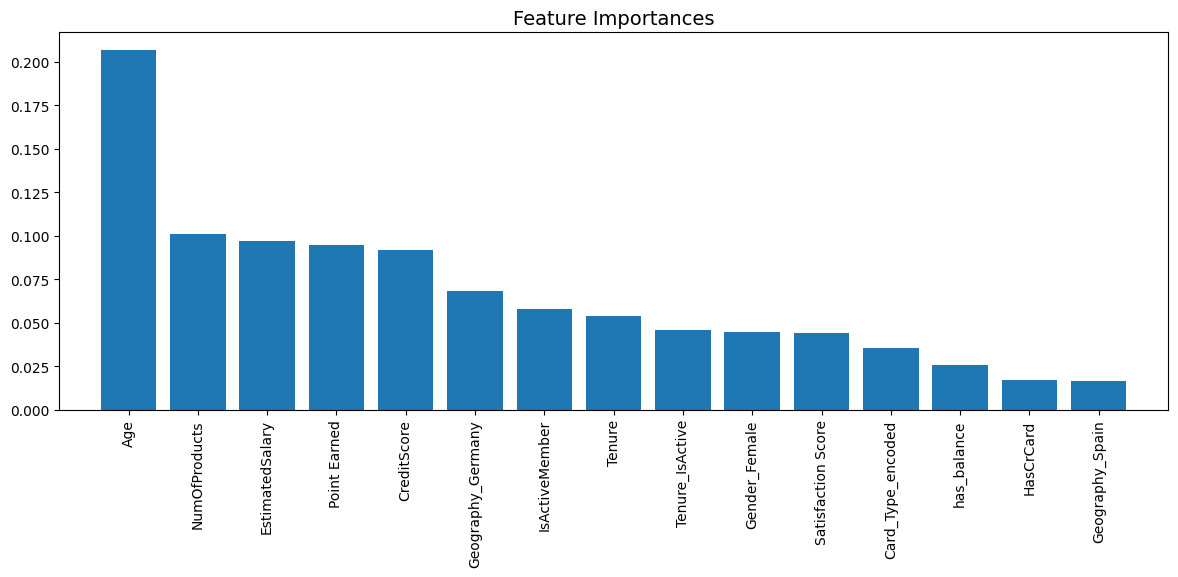

In [ ]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.tight_layout()
plt.show()

### 1.5 Random Forest with Top 6 Important Features

In [ ]:
# 1. Identify the top 6 features from the best model
importances = best_rf.feature_importances_
# Sort indices of features in descending order
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:6]]
print("Top 6 features:", top_features.tolist())

# 2. Create a new training dataset with only these top features
X_top = X[top_features]

# 3. Re-run grid search using only the top 6 features
grid_search_top = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_top.fit(X_top, y)

print("Best parameters found:", grid_search_top.best_params_)
print("Best cross-validation recall: {:.4f}".format(grid_search_top.best_score_),'\n')
best_rf_top = grid_search_top.best_estimator_

print("Evaluate on the test set:")
X_test_top = x_test[top_features]
y_pred_top = best_rf_top.predict(X_test_top)
print(classification_report(y_test, y_pred_top))

Top 6 features: ['Age', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'CreditScore', 'Geography_Germany']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best cross-validation recall: 0.7719 

Evaluate on the test set:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1592
           1       0.45      0.69      0.54       408

    accuracy                           0.76      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.81      0.76      0.78      2000



### 2. XGBoosting

In [ ]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [600, 650, 700],
    'max_depth': [10, 20, 30],  # XGBoost requires integer depths; adjust as needed
    'learning_rate': [0.01],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.8, 0.9, 1],
}

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation recall: {:.4f}".format(grid_search.best_score_),'\n')
best_xgb = grid_search.best_estimator_

print("Evaluate on the test set:")
y_pred = best_xgb.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 600, 'subsample': 0.6}
Best cross-validation recall: 0.8072 

Evaluate on the test set:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1592
           1       0.54      0.68      0.60       408

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.82      2000



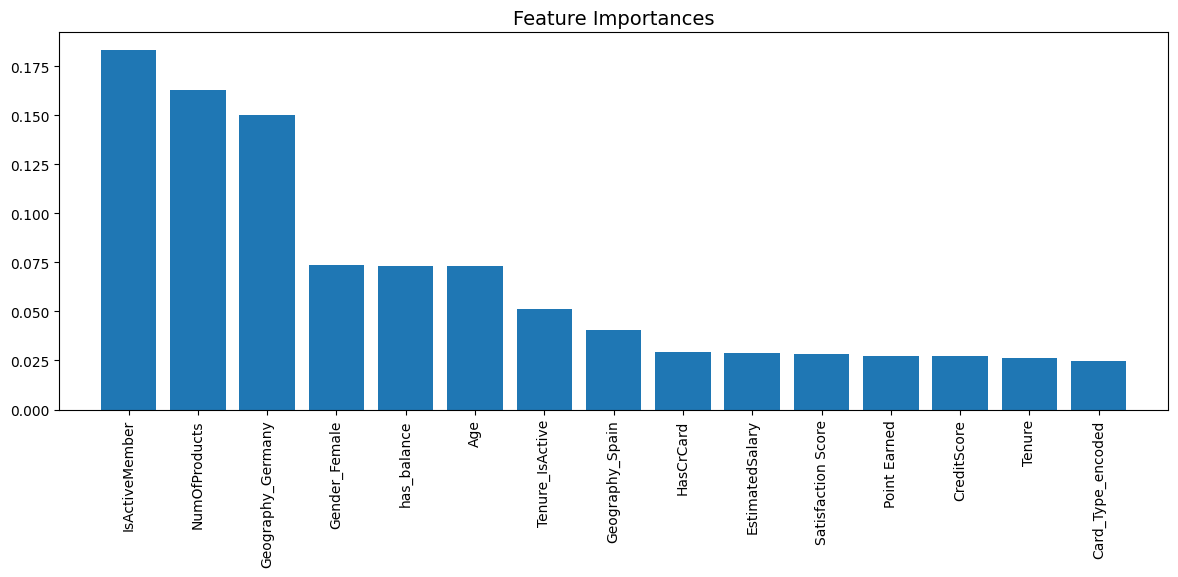

In [ ]:
# Get feature importances
importances = best_xgb.feature_importances_
feature_names = X.columns

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.xticks(range(len(indices)), feature_names[indices], rotation=90)
plt.xlim([-1, len(indices)])
plt.tight_layout()
plt.show()

### 2.5 XGBoosting with Top 8 Important Features  

In [ ]:
# 1. Identify the top 8 features from the best model
importances = best_xgb.feature_importances_
# Sort indices of features in descending order
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:8]]
print("Top 8 features:", top_features.tolist())

# 2. Create a new training dataset with only these top features
X_top = X[top_features]

# 3. Re-run grid search using only the top 6 features
grid_search_top = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross validation
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_top.fit(X_top, y)

print("Best parameters found:", grid_search_top.best_params_)
print("Best cross-validation recall: {:.4f}".format(grid_search_top.best_score_),'\n')
best_xgb_top = grid_search_top.best_estimator_

print("Evaluate on the test set:")
X_test_top = x_test[top_features]
y_pred_top = best_xgb_top.predict(X_test_top)
print(classification_report(y_test, y_pred_top))

Top 8 features: ['IsActiveMember', 'NumOfProducts', 'Geography_Germany', 'Gender_Female', 'has_balance', 'Age', 'Tenure_IsActive', 'Geography_Spain']
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/maggiehuang/Desktop/INSY695_Enterprise Data Science & Machine Learning in Production I/Bank Customer Attrition Insights Project/.venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [00:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maggiehuang/Desktop/INSY695_Enterprise Data Science & Machine Learning in Production I/Bank Customer Attrition Insights Project/.venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [00:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "C", "solver" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/maggiehuang/Desktop/INSY695_Enterprise Data Science & Machine Learning in Production I/Bank Customer Attrition Insights Project/.venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [00:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 


Best parameters found: {'C': 0.0001, 'solver': 'liblinear'}
Best cross-validation recall: 0.7817 

Evaluate on the test set:
              precision    recall  f1-score   support

           0       0.91      0.82      0.87      1592
           1       0.51      0.70      0.59       408

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



### 3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search.fit(X, y)


grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=0,
    refit=False   # <-- disable auto-refit
)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    # 1. Grid search
    grid_search.fit(X, y)

best_params = grid_search.best_params_

# 2. Manually refit a new model with best params
best_lr = LogisticRegression(
    penalty='l2',
    random_state=42,
    max_iter=100000,
    **best_params
)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    best_lr.fit(X, y)

# 3. Predict on test
print("Evaluate on the test set:")
y_pred = best_lr.predict(x_test)
print(classification_report(y_test, y_pred))

/Users/maggiehuang/Desktop/INSY695_Enterprise Data Science & Machine Learning in Production I/Bank Customer Attrition Insights Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/maggiehuang/Desktop/INSY695_Enterprise Data Science & Machine Learning in Production I/Bank Customer Attrition Insights Project/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or

Evaluate on the test set:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1592
           1       0.40      0.61      0.48       408

    accuracy                           0.74      2000
   macro avg       0.64      0.69      0.65      2000
weighted avg       0.79      0.74      0.75      2000



### 4. Support Vector Machine

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create a pipeline: scaler -> SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

# Define the parameter grid, referencing the "svc" step
param_grid = {
    'svc__C': [1, 10, 50, 100],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__degree': [2, 3, 4],
    'svc__gamma': ['scale', 'auto']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Fit on the training data
grid_search.fit(X, y)

# Print results
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation recall: {:.4f}".format(grid_search.best_score_),'\n')

best_svm = grid_search.best_estimator_

# Evaluate on the test set
print("Evaluate on the test set:")
y_pred = best_svm.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best parameters found: {'svc__C': 10, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation recall: 0.7735 

Evaluate on the test set:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1592
           1       0.48      0.66      0.56       408

    accuracy                           0.79      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



### 5. Stacking All the Models

In [ ]:
best_rf = grid_search.best_estimator_
best_xgb = grid_search.best_estimator_
best_lr = grid_search.best_estimator_
best_svm = grid_search.best_estimator_

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Create a list of base estimators for the stacking model.
estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lr', best_lr),
    ('svm', best_svm)
]

# Initialize the StackingClassifier.
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=5,
    n_jobs=-1,
    passthrough=False  # Set to True if you want to include original features alongside predictions from base models
)

# Fit the stacking model on your resampled training data.
stack_model.fit(x_res, y_res)

print("Evaluate on the test set:")
y_pred = stack_model.predict(x_test)
print(classification_report(y_test, y_pred))

Evaluate on the test set:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1592
           1       0.49      0.65      0.56       408

    accuracy                           0.79      2000
   macro avg       0.69      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



#4. CAUSAL INFERENCE

In [ ]:
pip install causalml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseTRegressor, BaseSRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier


In [ ]:
#Define Treatment Variable
T = df['NumOfProducts'].apply(lambda x: 1 if x>2 else 0) #Determine the effect of having more than 2 products on churning

#Define the outcome variable (Exited - Churn)
Y = df['Exited'].astype(int)

#Define Confounders (Control Variables)
X = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary',
       'Satisfaction Score', 'Card Type', 'Point Earned']]

#One-hot encode categorical
X = pd.get_dummies(X, columns=['Geography','Gender'], drop_first=True)

#Mapping credit card type
mapping = {'SILVER': 0, 'GOLD': 1, 'PLATINUM': 2, 'DIAMOND': 3}
X['Card_Type_encoded'] = X['Card Type'].map(mapping)
X = X.drop(columns=['Card Type'])

#Drop the treatment variable from X
X = X.drop(columns=['NumOfProducts'])

#Standarize numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=X.columns)

In [ ]:
# Define base models for treatment & control
learner_t = XGBRegressor()
learner_c = XGBRegressor()

# Initialize X-Learner
x_learner = BaseXRegressor(learner_t, learner_c)

# Fit and Predict Individual Treatment Effects (ITE)
ite_x = x_learner.fit_predict(X, T, Y)

# Estimate Average Treatment Effect (ATE)
ate_x = np.mean(ite_x)
print(f"Estimated ATE using X-Learner: {ate_x:.4f}")

#Conclusion: Havinfg more products increases the probability of churning by 0.5

Estimated ATE using X-Learner: 0.5799


In [ ]:
# Define base models
t_learner = BaseTRegressor(learner=XGBRegressor())

# Fit and Predict ITE
ite_t = t_learner.fit_predict(X, T, Y)

# Estimate ATE
ate_t = np.mean(ite_t)
print(f"Estimated ATE using T-Learner: {ate_t:.4f}")

Estimated ATE using T-Learner: 0.5983


In [ ]:
# Define base model
s_learner = BaseSRegressor(learner=XGBRegressor())

# Fit and Predict ITE
ite_s = s_learner.fit_predict(X, T, Y)

# Estimate ATE
ate_s = np.mean(ite_s)
print(f"Estimated ATE using S-Learner: {ate_s:.4f}")

Estimated ATE using S-Learner: 0.5664


In [ ]:
# Define R-Learner
r_learner = BaseRRegressor(learner=XGBRegressor())

# Fit and Predict Individual Treatment Effects (ITE)
ite_r = r_learner.fit_predict(X, T, Y)

# Estimate Average Treatment Effect (ATE)
ate_r = np.mean(ite_r)
print(f"Estimated ATE (Continuous Treatment): {ate_r:.4f}")

Estimated ATE (Continuous Treatment): 0.5749


<ipython-input-98-d9673bbdd8b8>:18: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'y': Y.ravel(),
<ipython-input-98-d9673bbdd8b8>:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'w': T.ravel()


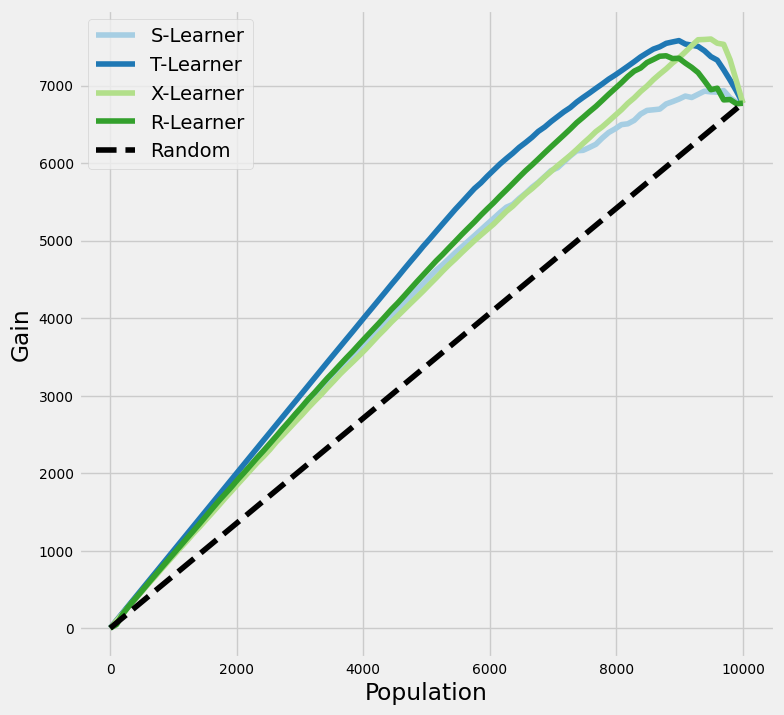

In [ ]:
from causalml.metrics import *

#S-learner
x_ite_s = s_learner.fit_predict(X, T, Y)
#T-Learner
x_ite_t = t_learner.fit_predict(X, T, Y)
#X-learner
x_ite_x = x_learner.fit_predict(X, T, Y)
#R-learner
x_ite_r = r_learner.fit_predict(X, T, Y)

#Creation of the dataframe
df_preds = pd.DataFrame({
    'S-Learner': x_ite_s.ravel(),
    'T-Learner': x_ite_t.ravel(),
    'X-Learner': x_ite_x.ravel(),
    'R-Learner': x_ite_r.ravel(),
    'y': Y.ravel(),
    'w': T.ravel()
})

df_cumgain = get_cumgain(df_preds)

plot(df_preds)


In [ ]:
df_result = pd.DataFrame([ate_s, ate_t, ate_x, ate_r],
                         index=['S','T','X','R'], columns=['ATE'])

auuc_scores = list(auuc_score(df_preds))
df_result['AUUC'] = auuc_scores
df_result

#Higher AUUC means that the model is better at differentiating between customers who respond to the treatment (having > 2 products) and those who do not.
#The model successfully distinguishes customers who churn because of having multiple products vs those who don't.
#May be customers churn as they might feel overwhelmed of not seeing the value in additional products; or probably they had a bad experience managing more than 2 products.


ATE      AUUC
S  0.566440  0.616129
T  0.598283  0.674897
X  0.579941  0.625217
R  0.574896  0.641603

In [ ]:
#Model Interpretation with Feature Importance and SHAP Values
plt.style.use('fivethirtyeight')

learner_t_x = BaseTRegressor(learner = XGBRegressor())
ate_t_x = learner_t_x.estimate_ate(X = X, treatment=T, y=Y)

learner_t_tau = learner_t_x.fit_predict(X, T, Y)

importances = learner_t_x.get_importance(X=X,
                        tau=learner_t_tau,
                        normalize=True,
                        method='auto',
                        features=X.columns)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

In [ ]:
importances[1]


Age                   0.294664
Balance               0.230227
EstimatedSalary       0.175521
IsActiveMember        0.074194
CreditScore           0.062664
Tenure                0.060200
Geography_Germany     0.039558
Point Earned          0.033409
Gender_Male           0.008472
HasCrCard             0.007334
Card_Type_encoded     0.006908
Satisfaction Score    0.005642
Geography_Spain       0.001207
dtype: float64

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

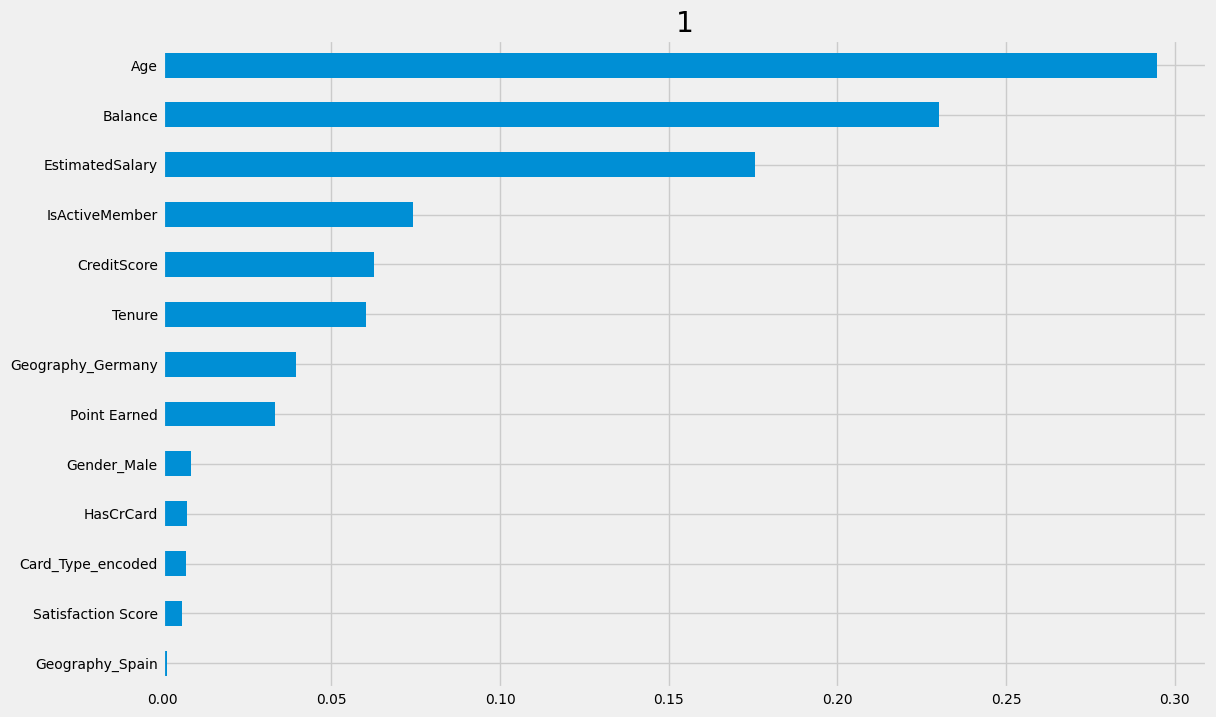

In [ ]:
learner_t_x.plot_importance(X=X,
                         tau=learner_t_tau,
                         normalize=True,
                         method='auto',  #decided to use auto since it shows the importances from the XGBoost algorithm
                         features=X.columns)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

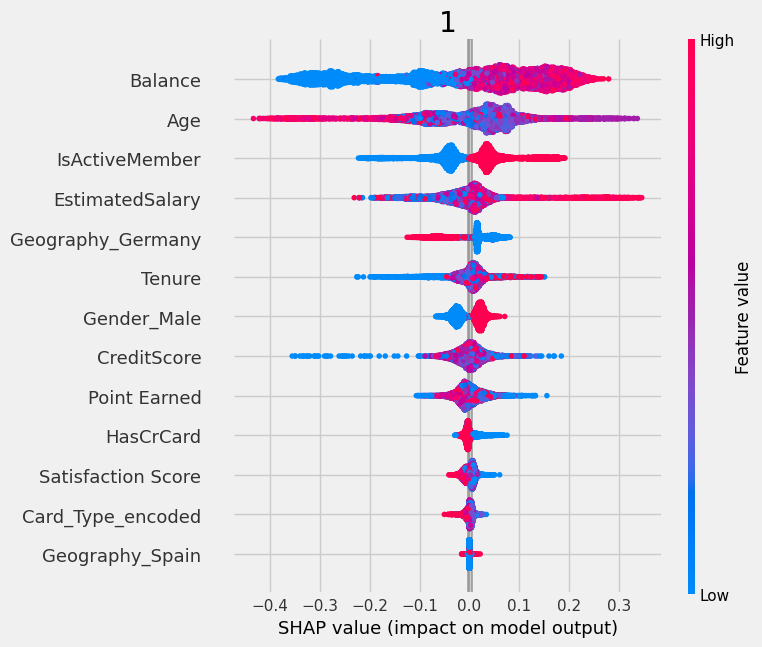

In [ ]:
#Shap Values
shap_tlearner = learner_t_x.get_shap_values(X=X, tau = learner_t_tau)
#shap_tlearner

feature_names = X.columns
# Plot shap values without specifying shap_dict
learner_t_x.plot_shap_values(X=X, tau=learner_t_tau, features=feature_names)


In [ ]:
#Customers with more than 2 products, with higher values in their balance, increase their likelihood of churning; on the other side, as customers age,
#they tend to have lower likelihood of churning given that they have more than 2 products.
#Customers with high balances might expect better service and leave if unsatisfied. They could also be moving money to another bank.